<a href="https://colab.research.google.com/github/suelencacicedo/mphy0041-cw2-pt/blob/main/Wine%20Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import urllib.request
import zipfile
import os

# URL for the Wine Quality dataset (UCI Machine Learning Repository)
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Name of the zip file to save locally
zip_filename = "wine_quality.zip"

# Download the ZIP file
print("Downloading wine_quality.zip...")
urllib.request.urlretrieve(url, zip_filename)
print("Download complete:", zip_filename)

# Create extraction folder
extract_folder = "wine_quality_data"
os.makedirs(extract_folder, exist_ok=True)


Download complete: wine_quality.zip


In [22]:
import urllib.request
import zipfile
import os
import pandas as pd

# 1. Download the Wine Quality dataset as wine_quality.zip


url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_filename = "wine_quality.zip"

print("Downloading wine_quality.zip...")
urllib.request.urlretrieve(url, zip_filename)
print("Download complete:", zip_filename)


# 2. Extract the ZIP into a clean folder


extract_folder = "wine_quality_data"

# Create folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

print("Extracting files...")
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction complete.")
print("Files extracted:", os.listdir(extract_folder))


# 3. Load the CSV files


# The ZIP contains these exact filenames:
red_path = os.path.join(extract_folder, "winequality-red.csv")
white_path = os.path.join(extract_folder, "winequality-white.csv")

print("Loading datasets...")

df_red = pd.read_csv(red_path, sep=";")
df_white = pd.read_csv(white_path, sep=";")

print("Red wine dataset shape:", df_red.shape)
print("White wine dataset shape:", df_white.shape)

df_red.head()

Download complete: wine_quality.zip
Extracting files...
Extraction complete.
Files extracted: ['winequality-white.csv', 'winequality.names', 'winequality-red.csv']
Loading datasets...
Red wine dataset shape: (1599, 12)
White wine dataset shape: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Download complete: wine_quality.zip
Extracting files...
Extraction complete.
Files extracted: ['winequality-white.csv', 'winequality.names', 'winequality-red.csv']
Red wine dataset shape: (1599, 12)
White wine dataset shape: (4898, 12)


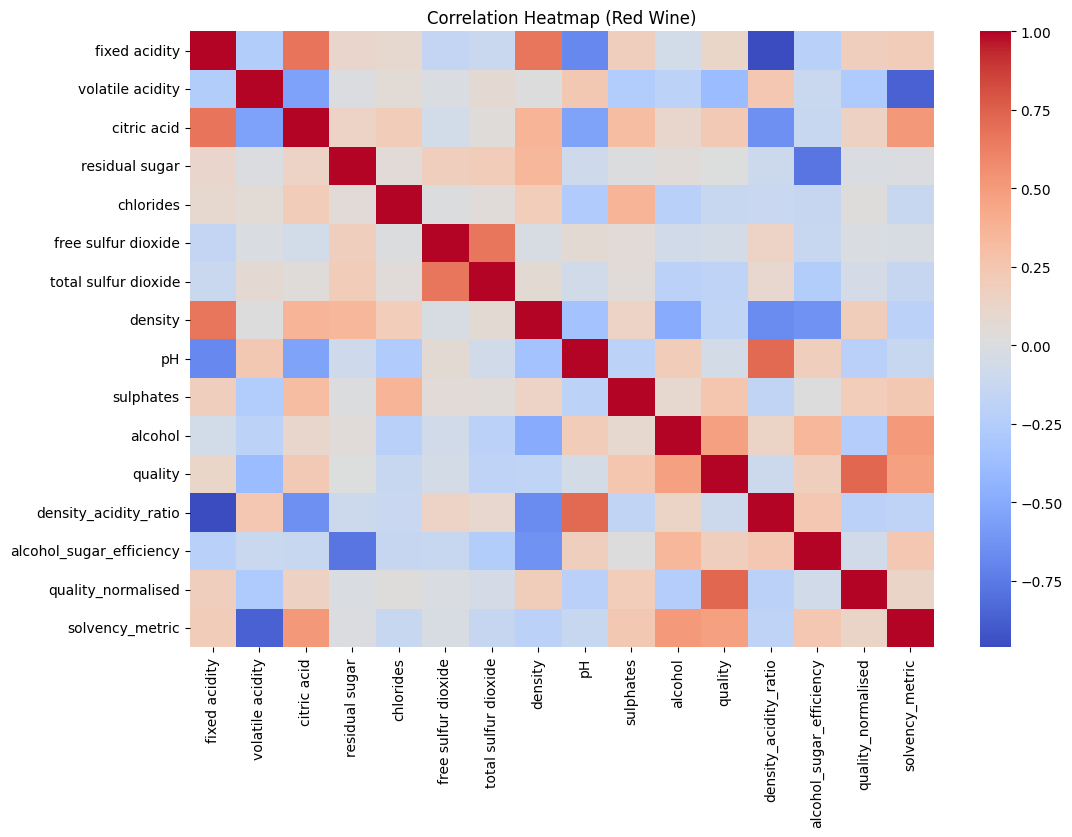

MSE: 0.0032937499999999994
R²: 0.9949598768660619
Processed datasets saved.


In [23]:
# ---------------------------------------------------------
# 0. Imports
# ---------------------------------------------------------
import urllib.request
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Download the Wine Quality dataset as wine_quality.zip

url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_filename = "wine_quality.zip"

print("Downloading wine_quality.zip...")
urllib.request.urlretrieve(url, zip_filename)
print("Download complete:", zip_filename)


# 2. Extract the ZIP into a clean folder

extract_folder = "wine_quality_data"
os.makedirs(extract_folder, exist_ok=True)

print("Extracting files...")
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction complete.")
print("Files extracted:", os.listdir(extract_folder))

# 3. Load the CSV files

red_path = os.path.join(extract_folder, "winequality-red.csv")
white_path = os.path.join(extract_folder, "winequality-white.csv")

df_red = pd.read_csv(red_path, sep=";")
df_white = pd.read_csv(white_path, sep=";")

print("Red wine dataset shape:", df_red.shape)
print("White wine dataset shape:", df_white.shape)


# 4. Engineering metrics (solvency-style)

def add_engineering_metrics(df):
    df["density_acidity_ratio"] = df["density"] / df["fixed acidity"]
    df["alcohol_sugar_efficiency"] = df["alcohol"] / (df["residual sugar"] + 1)
    df["quality_normalised"] = df["quality"] / df["alcohol"]
    df["solvency_metric"] = df["alcohol"] / (df["volatile acidity"] + 0.1)
    return df

df_red = add_engineering_metrics(df_red)
df_white = add_engineering_metrics(df_white)


# 5. Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df_red.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Red Wine)")
plt.show()

# 6. Regression model (predict wine quality)

X = df_red.drop("quality", axis=1)
y = df_red["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))


# 7. Save processed dataset

df_red.to_csv("wine_red_processed.csv", index=False)
df_white.to_csv("wine_white_processed.csv", index=False)

print("Processed datasets saved.")

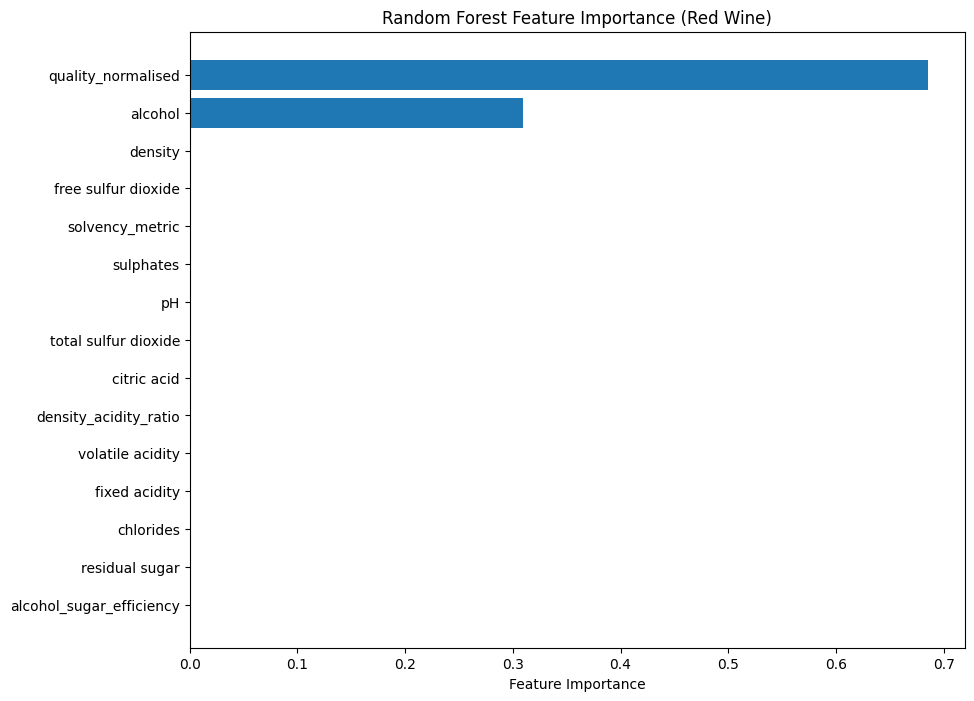

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Red Wine)")
plt.show()

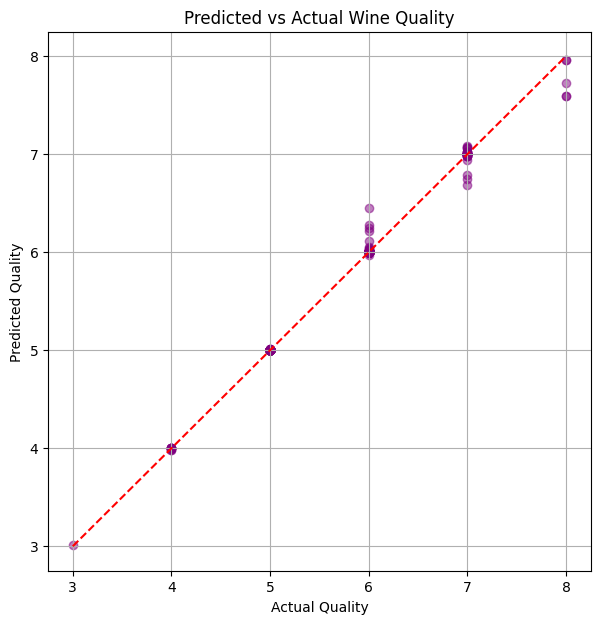

In [25]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, preds, alpha=0.5, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.grid(True)
plt.show()


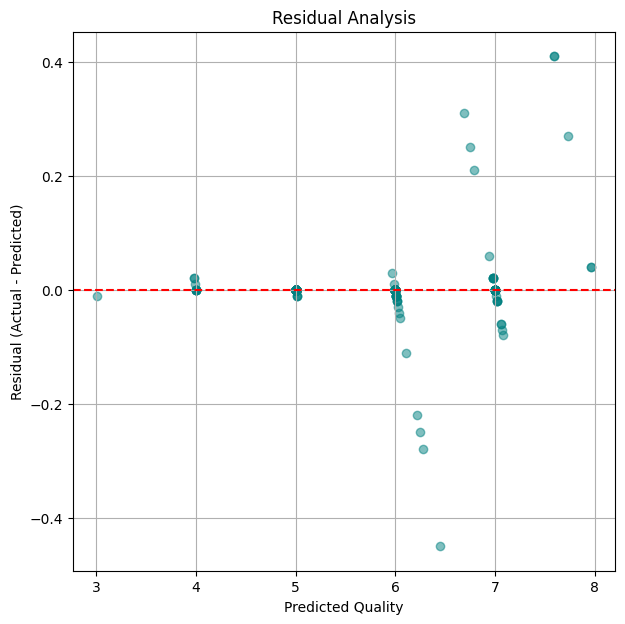

In [26]:
residuals = y_test - preds

plt.figure(figsize=(7, 7))
plt.scatter(preds, residuals, alpha=0.5, color="teal")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Analysis")
plt.grid(True)
plt.show()
